Dataset Keras dan Learning Rate

In [41]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [42]:
print("Ukuran Citra Train", train_images.shape)
print("Jumlah Label Train", train_labels.shape)

print("Ukuran Citra Test", train_images.shape)  #10.000 itu jumlah gambarnya, 28x28 itu ukuran gambar/citranya
print("Jumlah Label Test", train_labels.shape)

Ukuran Citra Train (60000, 28, 28)
Jumlah Label Train (60000,)
Ukuran Citra Test (60000, 28, 28)
Jumlah Label Test (60000,)


ada 60000 gambar dengan panjang 28 dan lebar 28

Menampilkan Data Training

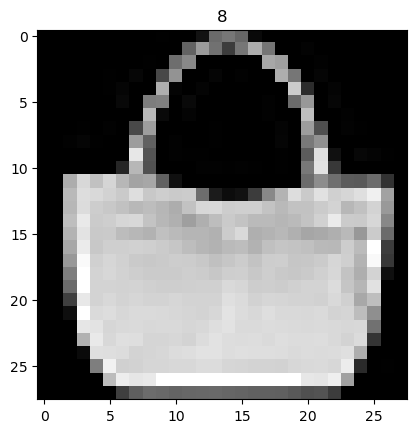

In [43]:
# mengambil contoh gambar ke 100 dari data train
plt.imshow(train_images[100], cmap='gray')
plt.title(train_labels[100])
plt.show()

In [44]:
# menampilkan gambar angka apa saja yang ada di data train (bersifat unique)
print(set(train_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


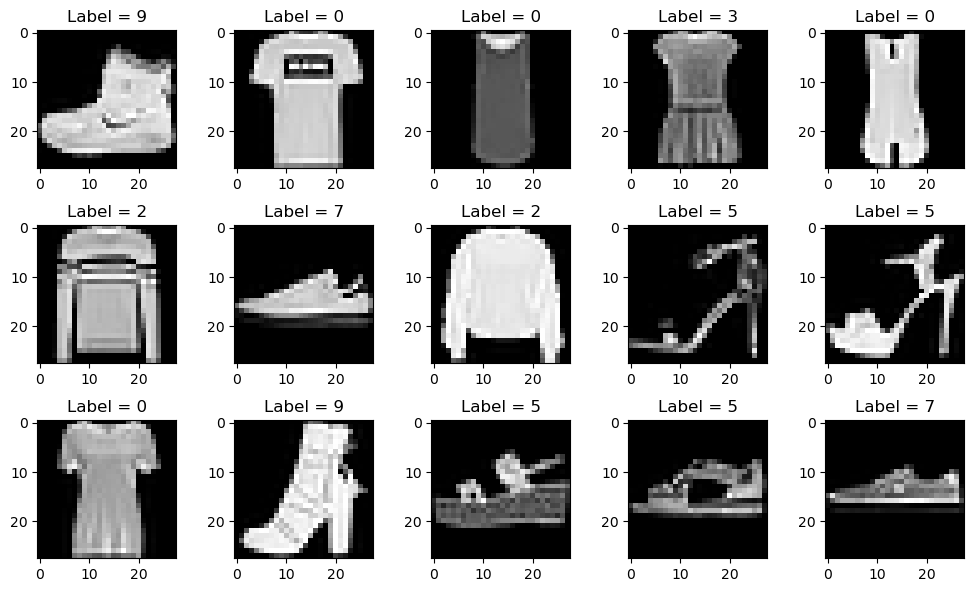

In [46]:
jumlah_baris = 3
jumlah_kolom = 5
jumlah_gambar = 15

gambar, axes = plt.subplots(jumlah_baris, jumlah_kolom, figsize=(2*jumlah_kolom, 2*jumlah_baris))

for i in range(jumlah_gambar):
    gambar = axes[i//jumlah_kolom, i%jumlah_kolom] # % sama dengan modulus atau sisa bagi
    gambar.imshow(train_images[i], cmap='gray')
    gambar.set_title('Label = {}'.format(train_labels[i]))
    
plt.tight_layout()
plt.show()

In [47]:
train_images = train_images.reshape((60000,28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000,28 * 28))
test_images = test_images.astype("float32") / 255

In [48]:
#Arsitektur Modelnya
import tensorflow as tf
import numpy as np

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')
])

In [49]:
model.compile(optimizer = 'rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(train_images, train_labels, epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2791 - accuracy: 0.8965
Epoch 2/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2650 - accuracy: 0.9020
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2540 - accuracy: 0.9058
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2437 - accuracy: 0.9093
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2334 - accuracy: 0.9133
Epoch 6/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2257 - accuracy: 0.9158
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2191 - accuracy: 0.9179
Epoch 8/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2121 - accuracy: 0.9210
Epoch 9/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2044 - accuracy: 0.9233
Epoch 10/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1988 

batch size/ukuran batch = ini adalah hyperparameter yang menentukan jumlah conton training yang digunakan dalam 1 iterasi

In [58]:
prediksi = model(test_images)
prediksi = prediksi.numpy() #supaya hasilnya array
prediksi_label = np.argmax(prediksi, axis=1)
prediksi_betul = prediksi_label == test_labels
print(f"akurasi:{prediksi_betul.mean():.2f}")

akurasi:0.90


In [53]:
prediksi_label

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)